In [1]:
%pip install pygrib

In [2]:
from datetime import timedelta
import pygrib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#time_diff = timedelta(hours=9)

gpv_file = pygrib.open("WT_20240301_FD01.grib2.bin")

In [3]:
grbs = gpv_file.select(typeOfLevel="depthBelowSea")
grbs

[1:Water temperature:K (avg):regular_ll:depthBelowSea:level 1.0:fcst time 0-24 hrs (avg):from 202402290000,
 2:Water temperature:K (avg):regular_ll:depthBelowSea:level 3.5:fcst time 0-24 hrs (avg):from 202402290000,
 3:Water temperature:K (avg):regular_ll:depthBelowSea:level 6.5:fcst time 0-24 hrs (avg):from 202402290000,
 4:Water temperature:K (avg):regular_ll:depthBelowSea:level 10.0:fcst time 0-24 hrs (avg):from 202402290000,
 5:Water temperature:K (avg):regular_ll:depthBelowSea:level 15.0:fcst time 0-24 hrs (avg):from 202402290000,
 6:Water temperature:K (avg):regular_ll:depthBelowSea:level 22.0:fcst time 0-24 hrs (avg):from 202402290000,
 7:Water temperature:K (avg):regular_ll:depthBelowSea:level 30.5:fcst time 0-24 hrs (avg):from 202402290000,
 8:Water temperature:K (avg):regular_ll:depthBelowSea:level 40.0:fcst time 0-24 hrs (avg):from 202402290000,
 9:Water temperature:K (avg):regular_ll:depthBelowSea:level 50.0:fcst time 0-24 hrs (avg):from 202402290000,
 10:Water temperature:

In [4]:
df = pd.DataFrame({
    "validDate": [grb.validDate for grb in grbs],
    "depthBelowSea": [grb.level for grb in grbs],
    "lats": [[item for sublist in grb.data()[1] for item in sublist] for grb in grbs],
    "lons": [[item for sublist in grb.data()[2] for item in sublist] for grb in grbs],
    "temperature": [[item for sublist in (grb.data()[0] - 273.15) for item in sublist] for grb in grbs]
})


print(df)

    validDate  depthBelowSea  \
0  2024-02-29              1   
1  2024-02-29              4   
2  2024-02-29              7   
3  2024-02-29             10   
4  2024-02-29             15   
5  2024-02-29             22   
6  2024-02-29             31   
7  2024-02-29             40   
8  2024-02-29             50   
9  2024-02-29             60   
10 2024-02-29             70   
11 2024-02-29             80   
12 2024-02-29             90   
13 2024-02-29            100   
14 2024-02-29            110   
15 2024-02-29            120   
16 2024-02-29            130   
17 2024-02-29            140   
18 2024-02-29            150   
19 2024-02-29            160   
20 2024-02-29            170   
21 2024-02-29            180   
22 2024-02-29            190   
23 2024-02-29            200   
24 2024-02-29            213   
25 2024-02-29            230   
26 2024-02-29            250   
27 2024-02-29            273   
28 2024-02-29            300   
29 2024-02-29            330   
30 2024-

C:\Users\KT8711co\AppData\Local\Temp\ipykernel_15080\3081054027.py:5: UserWarning: Warning: converting a masked element to nan.
  all_temperatures = np.concatenate(df['temperature'].values)
C:\Users\KT8711co\AppData\Local\Temp\ipykernel_15080\3081054027.py:13: UserWarning: Warning: converting a masked element to nan.
  color_intensity = (np.array(temperature) - min_temp) / (max_temp - min_temp)
c:\Users\KT8711co\anaconda3\envs\machinelearning\Lib\site-packages\numpy\ma\core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


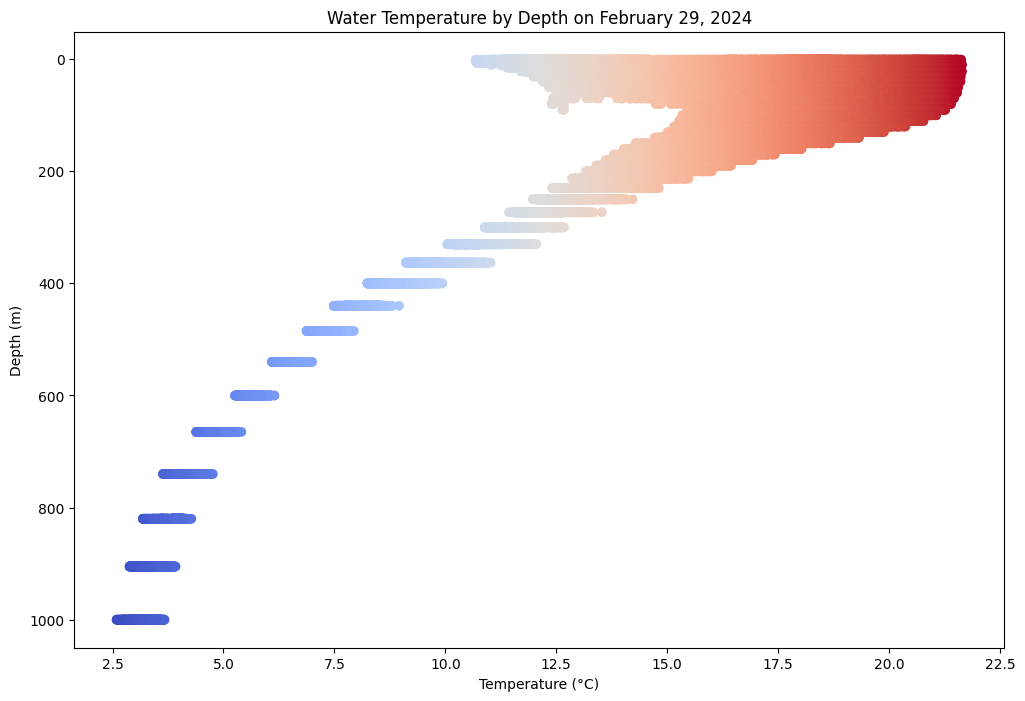

In [5]:
# グラフの作成
plt.figure(figsize=(12,8))

# 全体の水温の範囲を取得
all_temperatures = np.concatenate(df['temperature'].values)
min_temp = min(all_temperatures)
max_temp = max(all_temperatures)

for i in range(len(df)):
    depth = df['depthBelowSea'][i]
    temperature = df['temperature'][i]
    # 全体の水温の範囲に基づいて色を設定
    color_intensity = (np.array(temperature) - min_temp) / (max_temp - min_temp)
    colors = plt.cm.coolwarm(color_intensity)
    plt.scatter(temperature, [depth] * len(temperature), color=colors)

plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()  # 水深を反転
plt.title('Water Temperature by Depth on February 29, 2024')
plt.show()